<a href="https://colab.research.google.com/github/claredavies/MedicalImaging/blob/main/MedicalImagingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00


In [2]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os

import matplotlib
import pydicom
import numpy as np
import scipy
from matplotlib import pyplot as plt, animation

In [4]:
def median_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, :, img_dcm.shape[1]//2]    # Why //2?


def median_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the median sagittal plane of the CT image provided. """
    return img_dcm[:, img_dcm.shape[2]//2, :]


def MIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the sagittal orientation. """
    return np.max(img_dcm, axis=2)


def AIP_sagittal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the sagittal orientation. """
    return np.mean(img_dcm, axis=2)


def MIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the maximum intensity projection on the coronal orientation. """
    return np.max(img_dcm, axis=1)


def AIP_coronal_plane(img_dcm: np.ndarray) -> np.ndarray:
    """ Compute the average intensity projection on the coronal orientation. """
    return np.mean(img_dcm, axis=1)


def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """ Rotate the image on the axial plane. """
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

How do you know the pixel_len_mm???

In [6]:
dcm = pydicom.dcmread('1-1.dcm')     # Load DICOM file
print(dcm)                          # Print DICOM headers
pixel_len_mm = [3.27, 0.98, 0.98]   # Pixel length in mm [z, y, x]
img_dcm = dcm.pixel_array           # Get pixel array
img_dcm = np.flip(img_dcm, axis=0)  # Change orientation (better visualization)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.773.1600928601.639562
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Segmentation Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.773.1600928601.63956

In [13]:
# Search for 'Acquisition Number'
if 'Acquisition Number' in dcm:
    acquisition_number = dcm.AcquisitionNumber
    print(f"Acquisition Number: {acquisition_number}")
else:
    print("Acquisition Number not found in the DICOM headers.")

# Search for 'Slice Index'
if 'Slice Index' in dcm:
    slice_index = dcm.SliceIndex
    print(f"Slice Index: {slice_index}")
else:
    print("Slice Index not found in the DICOM headers.")

# Search for 'Per-frame Functional Groups Sequence' and 'Image Position Patient'
if 'PerFrameFunctionalGroupsSequence' in dcm:
    per_frame_groups = dcm.PerFrameFunctionalGroupsSequence
    for group in per_frame_groups:
        if 'ImagePositionPatient' in group:
            image_position = group.ImagePositionPatient
            print(f"Image Position Patient: {image_position}")
else:
    print("Per-frame Functional Groups Sequence not found in the DICOM headers.")

# Search for 'Segment Identification Sequence' and 'Referenced Segment Number'
if 'SegmentIdentificationSequence' in dcm:
    segment_sequence = dcm.SegmentIdentificationSequence
    for segment in segment_sequence:
        if 'ReferencedSegmentNumber' in segment:
            referenced_segment_number = segment.ReferencedSegmentNumber
            print(f"Referenced Segment Number: {referenced_segment_number}")
else:
    print("Segment Identification Sequence not found in the DICOM headers.")

Acquisition Number not found in the DICOM headers.
Slice Index not found in the DICOM headers.
Segment Identification Sequence not found in the DICOM headers.


/usr/local/lib/python3.10/dist-packages/pydicom/dataset.py:520: UserWarning: Invalid value 'Acquisition Number' used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/pydicom/dataset.py:520: UserWarning: Invalid value 'Slice Index' used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warnings.warn(msg)


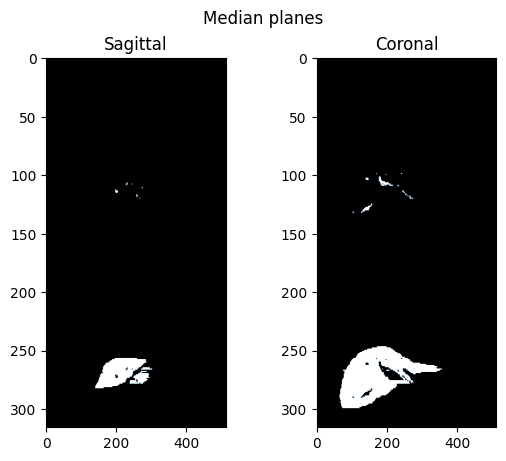

In [7]:
# Show median planes
fig, ax = plt.subplots(1, 2)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Sagittal')
ax[1].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[2])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()

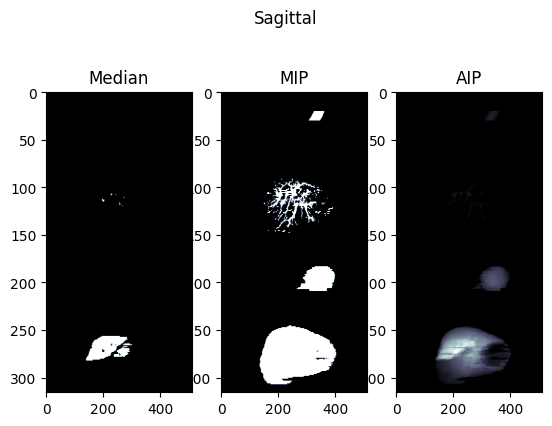

In [8]:
# Show MIP/AIP/Median planes
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_sagittal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()

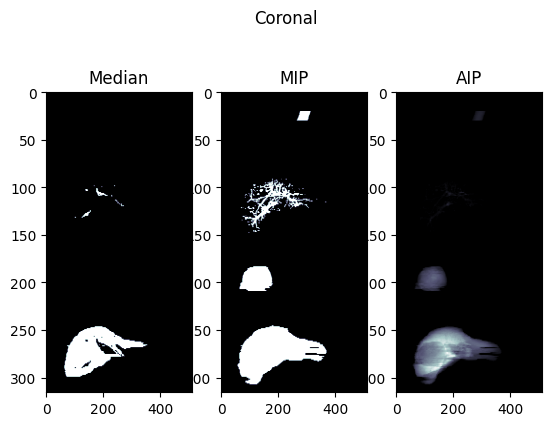

In [9]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(median_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[0].set_title('Median')
ax[1].imshow(MIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[1].set_title('MIP')
ax[2].imshow(AIP_coronal_plane(img_dcm), cmap=matplotlib.colormaps['bone'], aspect=pixel_len_mm[0]/pixel_len_mm[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()

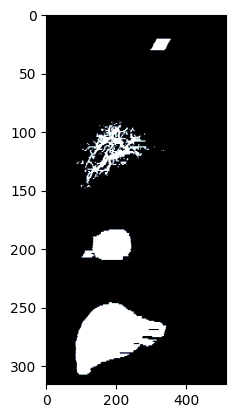

In [10]:
# Create projections varying the angle of rotation
#   Configure visualization colormap
img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = matplotlib.colormaps['bone']
fig, ax = plt.subplots()
#   Configure directory to save results
os.makedirs('results/MIP/', exist_ok=True)
#   Create projections
n = 6
projections = []
for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    rotated_img = rotate_on_axial_plane(img_dcm, alpha)
    projection = MIP_sagittal_plane(rotated_img)
    plt.imshow(projection, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])
    plt.savefig(f'results/MIP/Projection_{idx}.png')      # Save animation
    projections.append(projection)  # Save for later animation
# Save and visualize animation
animation_data = [
    [plt.imshow(img, animated=True, cmap=cm, vmin=img_min, vmax=img_max, aspect=pixel_len_mm[0] / pixel_len_mm[1])]
    for img in projections
]
anim = animation.ArtistAnimation(fig, animation_data,
                          interval=250, blit=True)
anim.save('results/MIP/Animation.gif')  # Save animation
plt.show() 

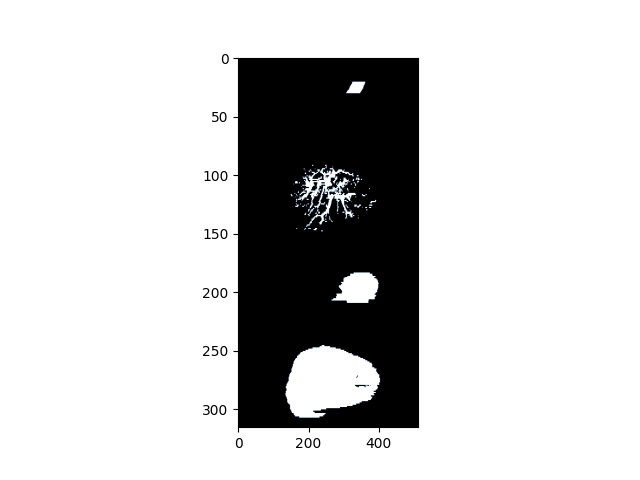

In [ ]:
from IPython.display import Image

# Provide the path to the GIF file
gif_path = 'results/MIP/Animation.gif'

# Display the GIF
Image(filename=gif_path)